In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the significant interactions and fitness results
significant_results = pd.read_csv('ecoli_significant_interactions.csv')
fitness_results = pd.read_csv('ecoli_fitness_results.csv')
p_values = pd.read_csv('ecoli_p_values.csv')

# Display the first few rows of the data
print("Significant Interactions:")
print(significant_results.head())

print("\nP-Values:")
print(p_values.head())

print("\nFitness Results:")
print(fitness_results.head())



Significant Interactions:
   Unnamed: 0   gene1      gene2  fdr_corrected_p_value
0           0  Gene_0  Gene_3780               0.004512
1           1  Gene_1     Gene_2               0.000116
2           2  Gene_1  Gene_3503               0.000456
3           3  Gene_1  Gene_3560               0.004966
4           4  Gene_1  Gene_3595               0.000005

P-Values:
  Unnamed: 0    Gene_0        Gene_1        Gene_2    Gene_3    Gene_4  \
0     Gene_0  1.000000  7.742109e-03  8.112911e-04  0.098352  0.083763   
1     Gene_1  0.007742  1.000000e+00  2.837969e-08  0.000062  0.000443   
2     Gene_2  0.000811  2.837969e-08  1.000000e+00  0.006302  0.006258   
3     Gene_3  0.098352  6.158023e-05  6.302357e-03  1.000000  0.187211   
4     Gene_4  0.083763  4.426348e-04  6.257705e-03  0.187211  1.000000   

     Gene_5    Gene_6    Gene_7    Gene_8  ...     Gene_3779     Gene_3780  \
0  0.576638  0.652401  0.077421  0.687794  ...  8.790043e-05  1.916523e-06   
1  0.570000  0.914508  0.6

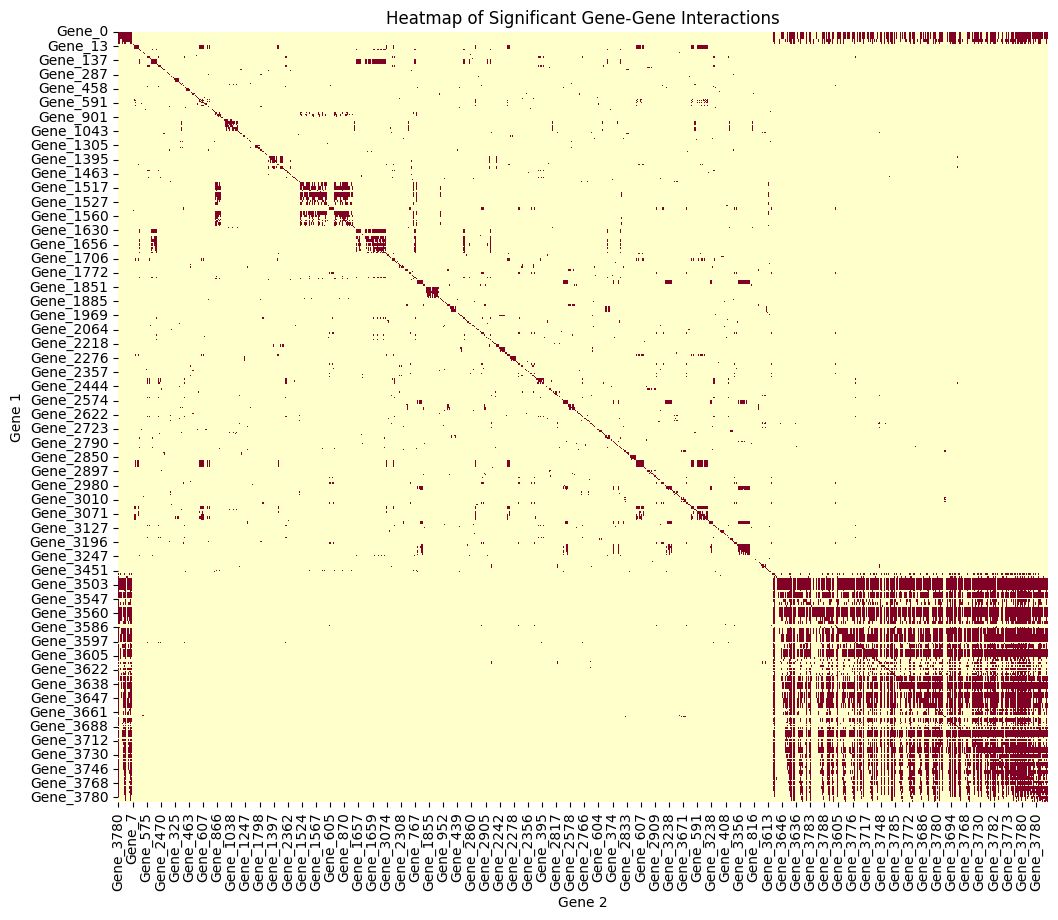

In [4]:
'''
Load Data: The significant interactions and fitness results are loaded from the CSV files you generated earlier.
Heatmap of Significant Interactions: A heatmap is created to visualize the significant gene-gene interactions. The matrix is filled based on the significant results.
Distribution of Fitness Metrics: A histogram is plotted to show the distribution of fitness metrics for the gene pairs, with a kernel density estimate (KDE) overlay.
Scatter Plot of Fitness Metrics: A scatter plot is created to visualize the fitness metrics for significant gene pairs, with a reference line at zero fitness.
'''
# Visualization 1: Heatmap of Significant Interactions
plt.figure(figsize=(12, 10))
significant_matrix = pd.DataFrame(0, index=significant_results['gene1'], columns=significant_results['gene2'])
for idx in significant_results.index:
    significant_matrix.loc[significant_results['gene1'][idx], significant_results['gene2'][idx]] = 1

sns.heatmap(significant_matrix, cmap='YlOrRd', cbar=False)
plt.title('Heatmap of Significant Gene-Gene Interactions')
plt.xlabel('Gene 2')
plt.ylabel('Gene 1')
plt.show()




Top 10 Most Similar Gene Interactions:
              gene1      gene2  coefficient
9725021   Gene_2567  Gene_1225     5.033844
10544578  Gene_2783  Gene_2574     4.562073
10543821  Gene_2783  Gene_1817     4.355901
12025962  Gene_3174  Gene_2850     4.136822
11273043  Gene_2975  Gene_3744     4.094814
              gene1      gene2  coefficient
9725021   Gene_2567  Gene_1225     5.033844
10544578  Gene_2783  Gene_2574     4.562073
10543821  Gene_2783  Gene_1817     4.355901
12025962  Gene_3174  Gene_2850     4.136822
11273043  Gene_2975  Gene_3744     4.094814
...             ...        ...          ...
6448412   Gene_1702  Gene_1236     2.559110
844865     Gene_223   Gene_141     2.558186
8490281   Gene_2241  Gene_1373    -2.548023
11271871  Gene_2975  Gene_2571     2.547640
10543384  Gene_2783  Gene_1380     2.546907

[100 rows x 3 columns]


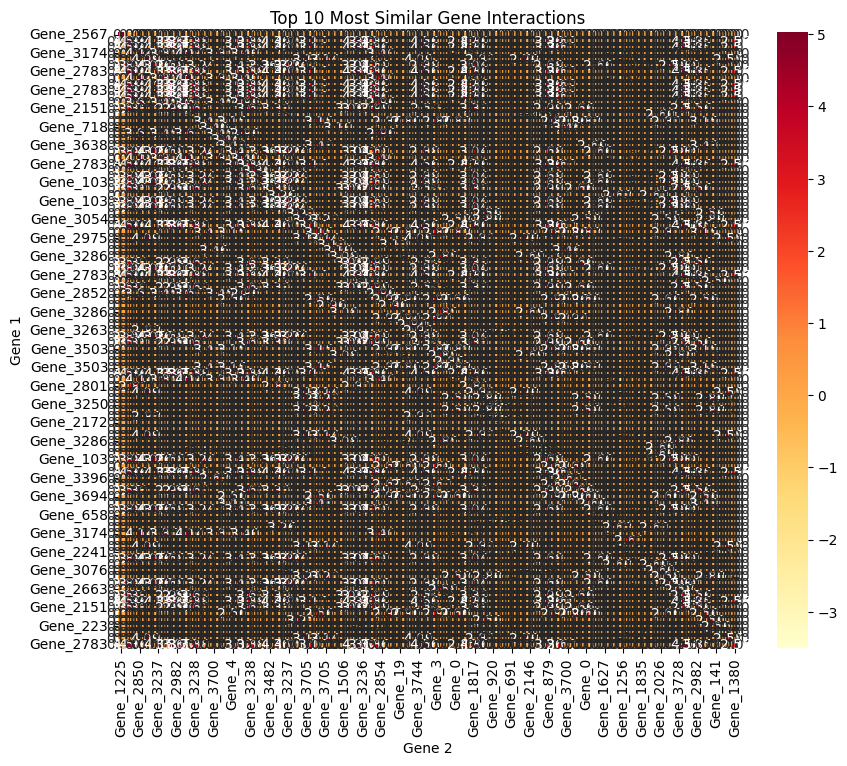

In [28]:
import numpy as np
def get_top_interactions(coef_df, top_n=10):
    # Create a DataFrame to hold the coefficients and their corresponding gene pairs
    # Create a mask for non-diagonal elements
    mask = ~np.eye(coef_df.shape[0], dtype=bool)
    
    # Get indices where mask is True
    i_indices, j_indices = np.where(mask)
    
    # Create DataFrame directly from arrays
    interactions = pd.DataFrame({
        'gene1': coef_df.index[i_indices],
        'gene2': "Gene_" + coef_df.columns[j_indices],
        'coefficient': pd.to_numeric(coef_df.values[mask], errors='coerce')
    })
    interactions_df = pd.DataFrame(interactions)
    # Sort by absolute coefficient values and get top N interactions
    interactions_df = interactions_df.sort_values(by='coefficient', key=abs, ascending=False)
    interactions_df = interactions_df.head(top_n)

    print(interactions_df.head())

    return interactions_df


coef_df = pd.read_csv('ecoli_gls_coefficients.csv', index_col=0)
print("Top 10 Most Similar Gene Interactions:")

# top_interactions = get_top_interactions(coef_df, top_n=10)
top_interactions = get_top_interactions(coef_df, top_n=100)
print(top_interactions)
# Create a heatmap for the top interactions
top_interaction_matrix = pd.DataFrame(0, index=top_interactions['gene1'], columns=top_interactions['gene2'])
for idx in top_interactions.index:
    top_interaction_matrix.loc[top_interactions['gene1'][idx], top_interactions['gene2'][idx]] = top_interactions['coefficient'][idx]

plt.figure(figsize=(10, 8))
sns.heatmap(top_interaction_matrix, cmap='YlOrRd', annot=True, fmt=".2f")
plt.title('Top 10 Most Similar Gene Interactions')
plt.xlabel('Gene 2')
plt.ylabel('Gene 1')
plt.show()


P-Values Data Types:
Unnamed: 0     object
Gene_0        float64
Gene_1        float64
Gene_2        float64
Gene_3        float64
               ...   
Gene_3784     float64
Gene_3785     float64
Gene_3786     float64
Gene_3787     float64
Gene_3788     float64
Length: 3790, dtype: object


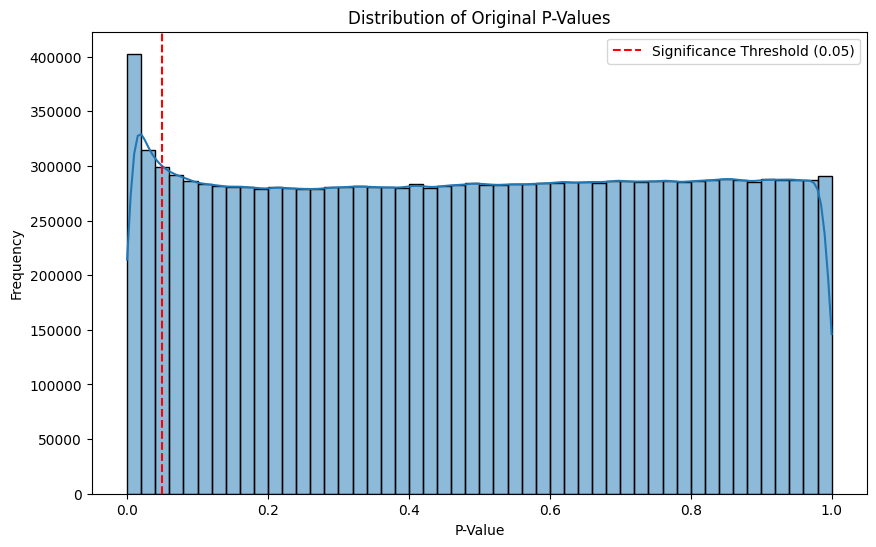

In [31]:
# Visualization 2: Distribution of P-Values
# Check the data types of the p_values DataFrame
print("P-Values Data Types:")
print(p_values.dtypes)
import numpy as np
# Flatten the p-values and convert to numeric, forcing errors to NaN
p_values_flat = pd.to_numeric(p_values.values.flatten(), errors='coerce')

# Drop NaN values if any exist
p_values_flat = p_values_flat[~np.isnan(p_values_flat)]

# Visualization 2: Distribution of P-Values
plt.figure(figsize=(10, 6))
sns.histplot(p_values_flat, bins=50, kde=True)
plt.title('Distribution of Original P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.axvline(x=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()




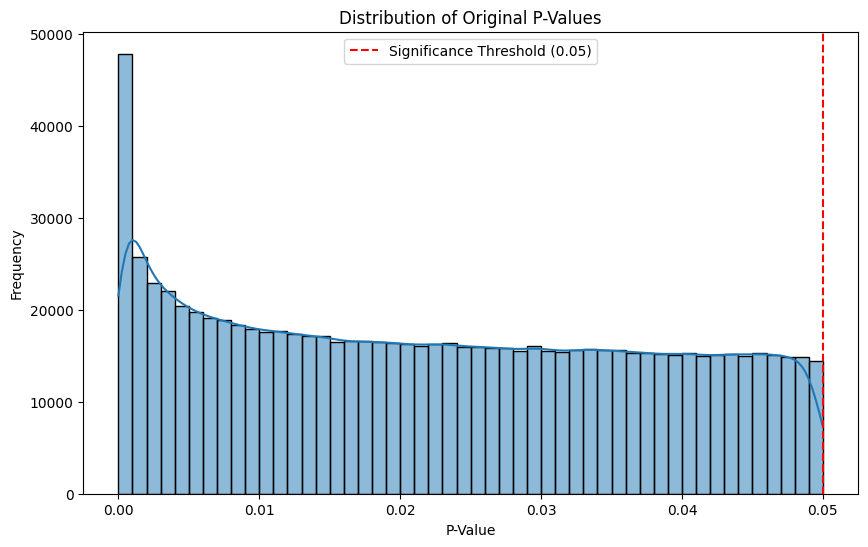

In [23]:
# Visualization 2: Distribution of P-Values
plt.figure(figsize=(10, 6))
sns.histplot(p_values_flat[p_values_flat < 0.05], bins=50, kde=True)
plt.title('Distribution of Original P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.axvline(x=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()



In [43]:
# Get unique genes from p_values DataFrame
add_gene = lambda x: "Gene_" + str(x)
all_genes = list(set(p_values.columns) | set(p_values.index.map(add_gene)))

# Filter fitness_results to only include these genes
filtered_fitness_results = fitness_results[
    (fitness_results['gene1'].isin(all_genes)) & 
    (fitness_results['gene2'].isin(all_genes))
]

# Print the number of genes and filtered results
print(f"Total number of unique genes: {len(all_genes)}")
print(f"Number of gene pairs in filtered results: {len(filtered_fitness_results)}")

# Update fitness_results with filtered data
fitness_results_filtered = filtered_fitness_results


Total number of unique genes: 3790
Number of gene pairs in filtered results: 3096


(3096, 4)

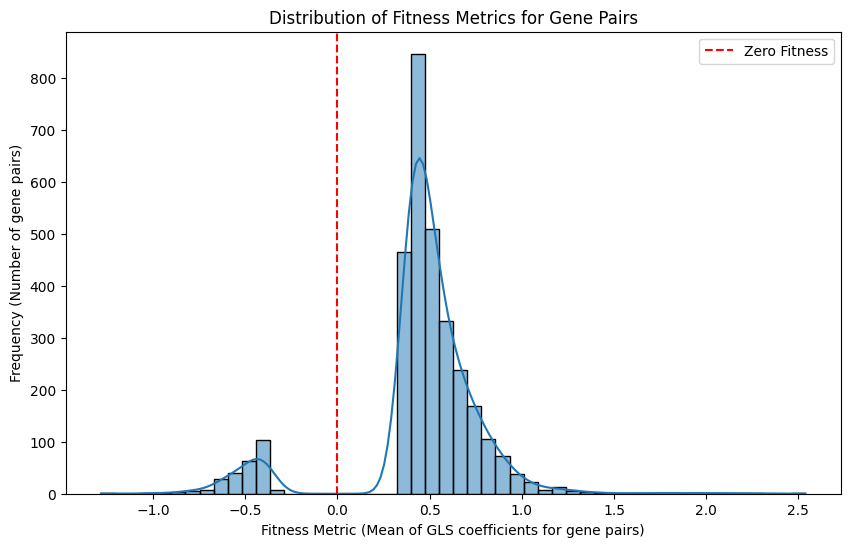

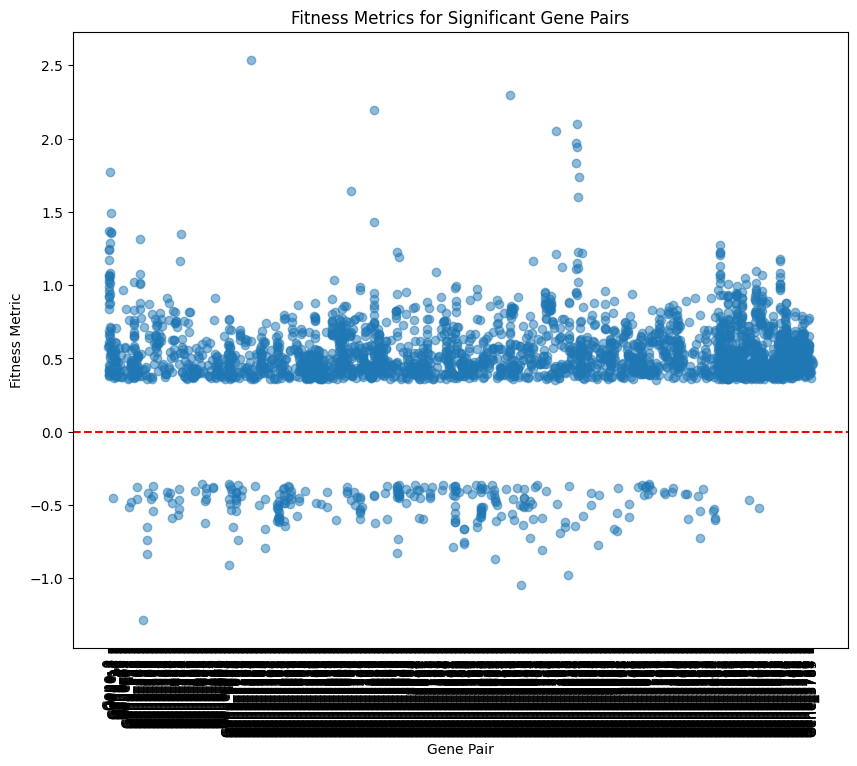

In [21]:
# Visualization 2: Distribution of Fitness Metrics
plt.figure(figsize=(10, 6))
sns.histplot(fitness_results['fitness_metric'], bins=50, kde=True)
plt.title('Distribution of Fitness Metrics for Gene Pairs')
plt.xlabel('Fitness Metric (Mean of GLS coefficients for gene pairs)')
plt.ylabel('Frequency (Number of gene pairs)')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Fitness')
plt.legend()
plt.show()

# Visualization 3: Scatter Plot of Fitness Metrics
plt.figure(figsize=(10, 8))
plt.scatter(fitness_results['gene1'], fitness_results['fitness_metric'], alpha=0.5)
plt.title('Fitness Metrics for Significant Gene Pairs')
plt.xlabel('Gene Pair')
plt.ylabel('Fitness Metric')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Fitness')